<a href="https://colab.research.google.com/github/2023garvitshrivastava-sketch/ML_lab/blob/main/Gradient_descent_for_house_priceipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Cost = 2.8149
Iteration 200: Cost = 0.3225
Iteration 400: Cost = 0.3225
Iteration 600: Cost = 0.3225
Iteration 800: Cost = 0.3225

Test MSE: 0.6575


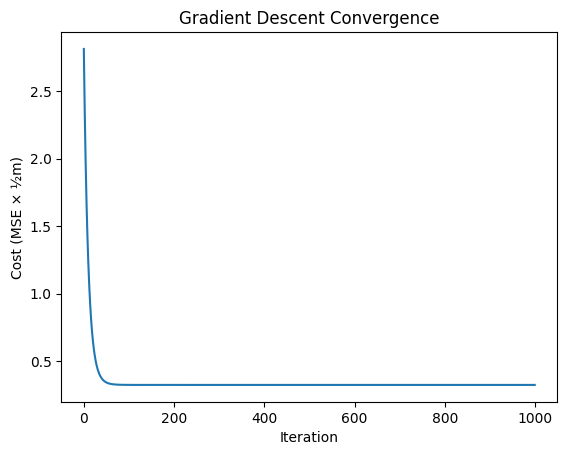

Predicted median house value: $374578.76


In [1]:
# ============================================
# 🏡 House Price Prediction with Gradient Descent
# Using California Housing Dataset (built-in)
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# --- 1. Load dataset ---
data = fetch_california_housing(as_frame=True)
df = data.frame

# Select a few simple features for demonstration
features = ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']
target = 'MedHouseVal'

X = df[features].values
y = df[target].values.reshape(-1, 1)

# --- 2. Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Normalize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term
m, n = X_train.shape
X_b = np.c_[np.ones((m, 1)), X_train]

# --- 4. Initialize parameters ---
theta = np.zeros((n + 1, 1))
alpha = 0.05
iterations = 1000
cost_history = []

# --- 5. Gradient Descent ---
for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y_train
    gradients = (1/m) * X_b.T.dot(errors)
    theta -= alpha * gradients
    cost = (1/(2*m)) * np.sum(errors**2)
    cost_history.append(cost)
    if i % 200 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

# --- 6. Evaluate model ---
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred = X_test_b.dot(theta)
mse = mean_squared_error(y_test, y_pred)
print(f"\nTest MSE: {mse:.4f}")

# --- 7. Plot cost function ---
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE × ½m)")
plt.title("Gradient Descent Convergence")
plt.show()

# --- 8. Example prediction ---
example = np.array([[8.0, 6.0, 20.0, 3.0]])  # MedInc, AveRooms, HouseAge, AveOccup
example_scaled = scaler.transform(example)
example_b = np.c_[np.ones((1, 1)), example_scaled]
pred_price = example_b.dot(theta)[0, 0]
print(f"Predicted median house value: ${pred_price * 100000:.2f}")
